In [16]:
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact #, interactive, fixed, interact_manual
from matplotlib.colors import ListedColormap

In [17]:
def generate_automaton(width, n_steps, rule_func, initial_conditions=None):
    """Generate automaton using a specific rule function."""
    # Initialize grid
    grid = np.zeros((n_steps, width), dtype=int)
    
    # Set initial conditions
    if initial_conditions is not None:
        if max(initial_conditions) >= width or min(initial_conditions) < 0:
            raise ValueError("Indices in initial_conditions must be within the grid width.")
        grid[0, initial_conditions] = 1
    else:
        # Default: One "alive" cell in the middle
        grid[0, width // 2] = 1

    
    # Generate automaton
    for i in range(1, n_steps):
        for j in range(width):
            left = grid[i-1, j-1] if j > 0 else 0
            center = grid[i-1, j]
            right = grid[i-1, j+1] if j < width - 1 else 0
            
            grid[i, j] = rule_func(left, center, right)
    
    return grid

# def plot_automaton(grid, animate=False, pause_time=0.1):
#     """Plot the automaton grid as an image, with optional animation."""
#     if animate:
#         for i in range(grid.shape[0]):
#             plt.imshow(grid[:i+1, :], cmap='binary')
#             plt.axis('off')
#             display(plt.gcf())
#             clear_output(wait=True)
#             time.sleep(pause_time)
#     else:
#         plt.imshow(grid, cmap='binary')
#         plt.axis('off')
#         plt.show()


def draw_automaton_cells(cells, outline, line, image_width=None):
    if image_width is None:
        image_width = 12

    image_height = image_width * grid.shape[0] / grid.shape[1]
    
    plt.figure(figsize=(image_width, image_height))
    
    if outline:
        # Create a color map: 0 - gray, 1 - white
        cmap = ListedColormap(['lightgray', 'black'])
    else:
        cmap = 'binary'
      
    if line:
        plt.imshow(cells, cmap=cmap)
    else:
        plt.imshow(cells, cmap=cmap, aspect='equal')
    plt.axis('off')
    plt.show()
    
def plot_automaton_grid(grid, outline=False, image_width=None):
    draw_automaton_cells(grid, outline, line=False, image_width=image_width)

def plot_automaton_step(grid, step, outline=False, image_width=None):
    draw_automaton_cells(grid[step:step+1, :], outline, line=True, image_width=image_width)

In [18]:
# Define rule functions
def rule_30(left, center, right):
    """Apply Rule 30 to the given neighborhood."""
    return left ^ (center or right)

def rule_90(left, center, right):
    """Apply Rule 90 to the given neighborhood."""
    return left ^ right

def rule_110(left, center, right):
    """Apply Rule 110 to the given neighborhood."""
    return left ^ (center or (center or right))

# Dictionary of rule functions
rule_functions = {
    'Rule 30': rule_30,
    'Rule 90': rule_90,
    'Rule 110': rule_110
}

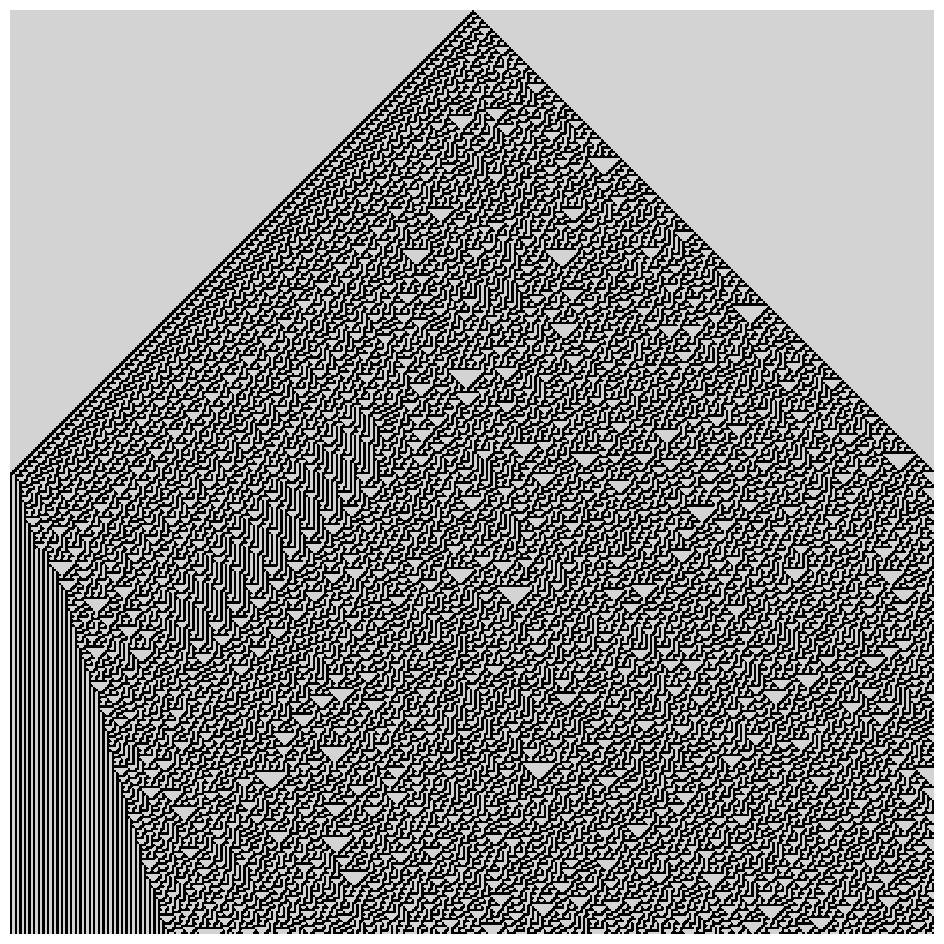

In [19]:
grid = generate_automaton(400, 400, rule_30)
plot_automaton_grid(grid, outline=True)

In [20]:
@interact(s=(0,len(grid)-1,1))
def foop(s=0):
    plot_automaton_step(grid, s, outline=True)
    return

interactive(children=(IntSlider(value=0, description='s', max=399), Output()), _dom_classes=('widget-interact'…

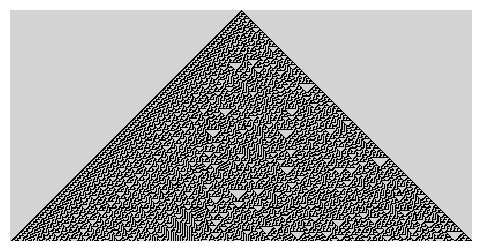

In [21]:
grid = generate_automaton(400, 200, rule_110)
plot_automaton_grid(grid, outline=True, image_width=6)

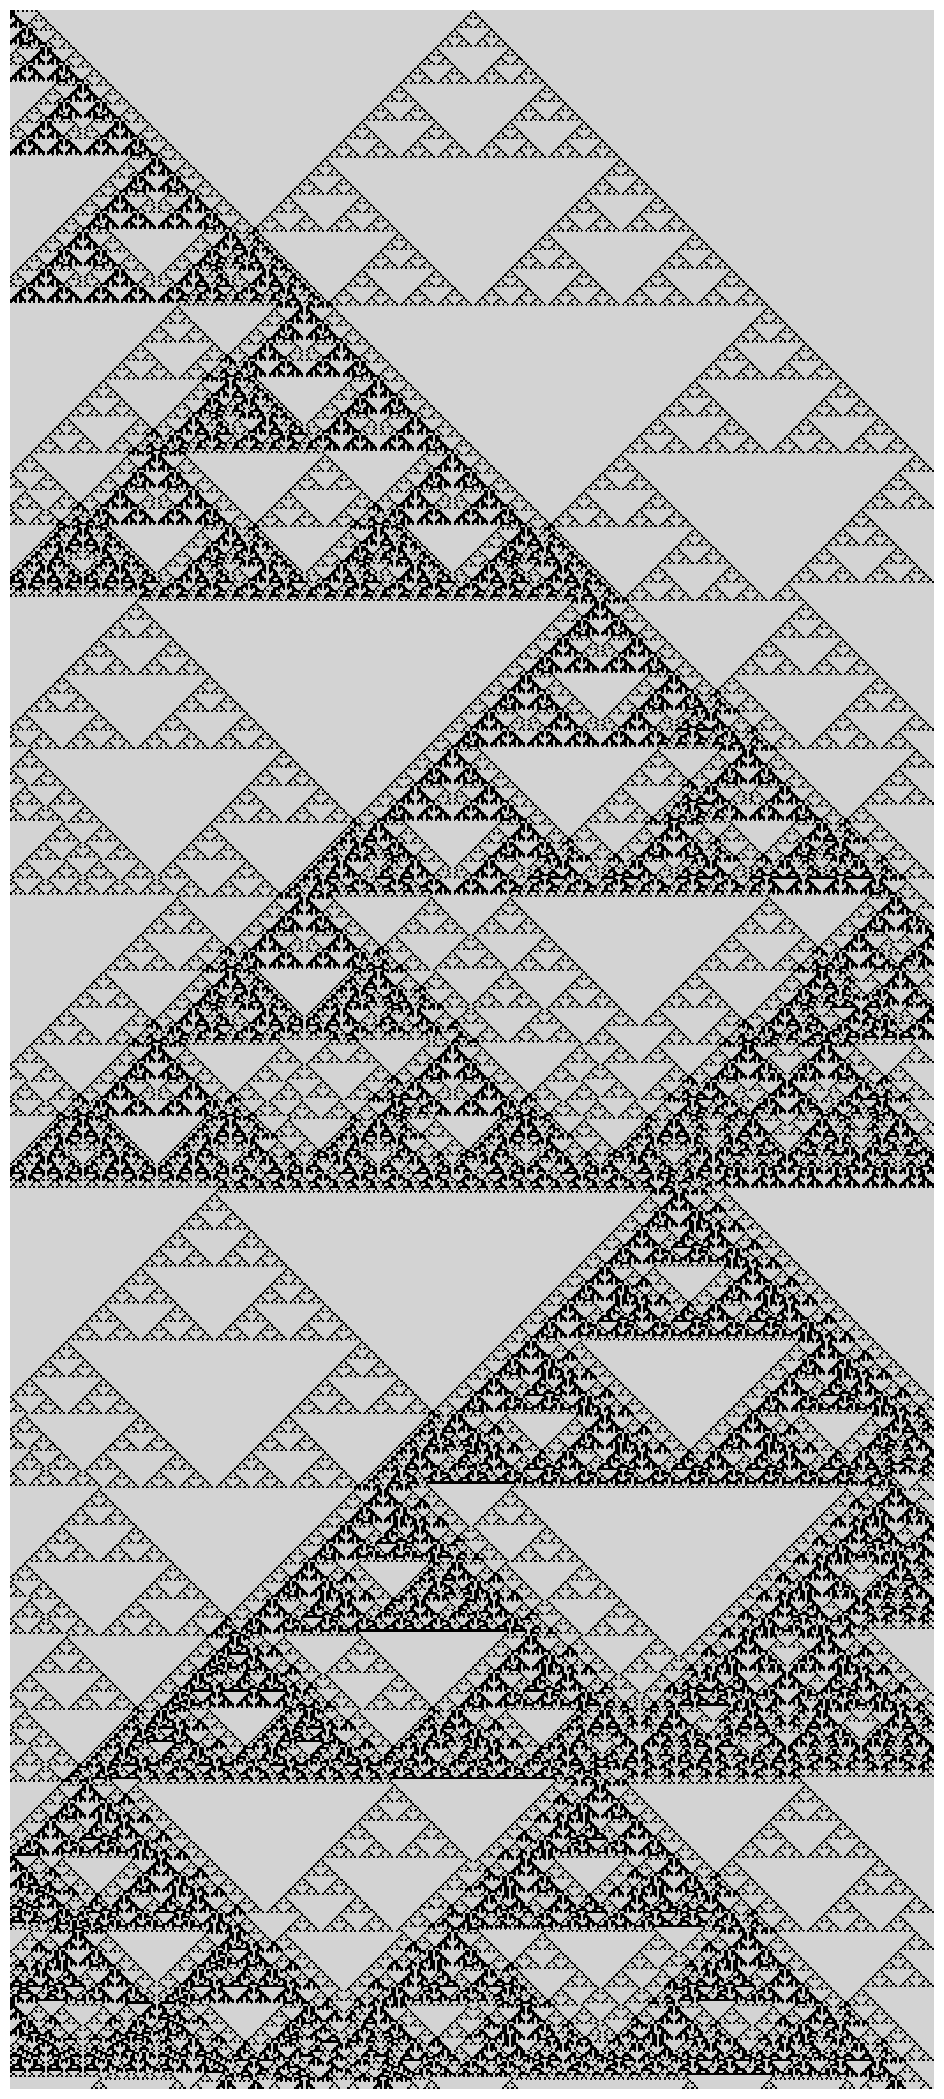

In [22]:
grid = generate_automaton(400, 900, rule_90, initial_conditions=[0, 1, 3, 5, 7, 9, 11, 200])
plot_automaton_grid(grid, outline=True)

In [23]:
@interact(s=(0,len(grid)-1,1))
def foop(s=0):
    plot_automaton_step(grid, s, outline=True)
    return

interactive(children=(IntSlider(value=0, description='s', max=899), Output()), _dom_classes=('widget-interact'…